In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
data=pd.read_csv('day.csv')

In [3]:
#viewing the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# there's no data missing 

In [8]:
# dropping the instant variable because it's a unique column thus it's not a useful coloumn
data=data.drop('instant',axis=1)

In [9]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# dropping the dteday as we have other variables like season,yr,month to describe that thus it's not a useful column
data=data.drop('dteday',axis=1)

In [11]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#dropping casual and registered as they are the type of the target variable which is cnt actually they are the sum hence they
# are highly co-related and these column won't be availble at the time of prediction thus it's not a useful column
data=data.drop(['casual','registered'],axis=1)

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
data.shape

(730, 12)

In [15]:
# season, yr, mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed are the independent variables 
# cnt is the target variable 

In [16]:
data.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [18]:
data.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [19]:
def map1(x):
    if x==0:
        return 'sunday'
    elif x==1:
        return 'monday'
    elif x==2:
        return 'tuesday'
    elif x==3:
        return 'wednesday'
    elif x==4:
        return 'thursday'
    elif x==5:
        return 'friday'
    else:
        return 'saturday'

In [20]:
def map2(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'

In [21]:
def map3(x):
    if x==1:
        return 'Jan'
    elif x==2:
        return 'Feb'
    elif x==3:
        return 'Mar'
    elif x==4:
        return 'Apr'
    elif x==5:
        return 'May'
    elif x==6:
        return 'Jun'
    elif x==7:
        return 'Jul'
    elif x==8:
        return 'Aug'
    elif x==9:
        return 'Sept'
    elif x==10:
        return 'Oct'
    elif x==11:
        return 'Nov'
    else:
        return 'Dec'

In [22]:
def map4(x):
    if x==1:
        return 'clear'
    elif x==2:
        return 'cloudy'
    elif x==3:
        return 'light snow rain'
    else:
        return 'heavy snow rain'

In [23]:
data.weathersit=data.weathersit.apply(map4)

In [24]:
data.weathersit.unique()

array(['cloudy', 'clear', 'light snow rain'], dtype=object)

In [25]:
data.weekday=data.weekday.apply(map1)

In [26]:
data.weekday.unique()

array(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday'], dtype=object)

In [27]:
data.season=data.season.apply(map2)

In [28]:
data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [29]:
data.mnth=data.mnth.apply(map3)

In [30]:
data.mnth.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [31]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


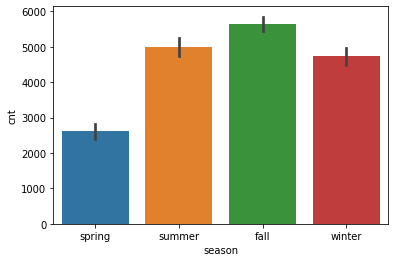

In [32]:
sns.barplot(x='season', y='cnt', data=data)
plt.show()


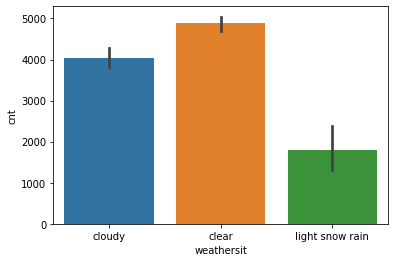

In [33]:
sns.barplot(x='weathersit', y='cnt', data=data)
plt.show()


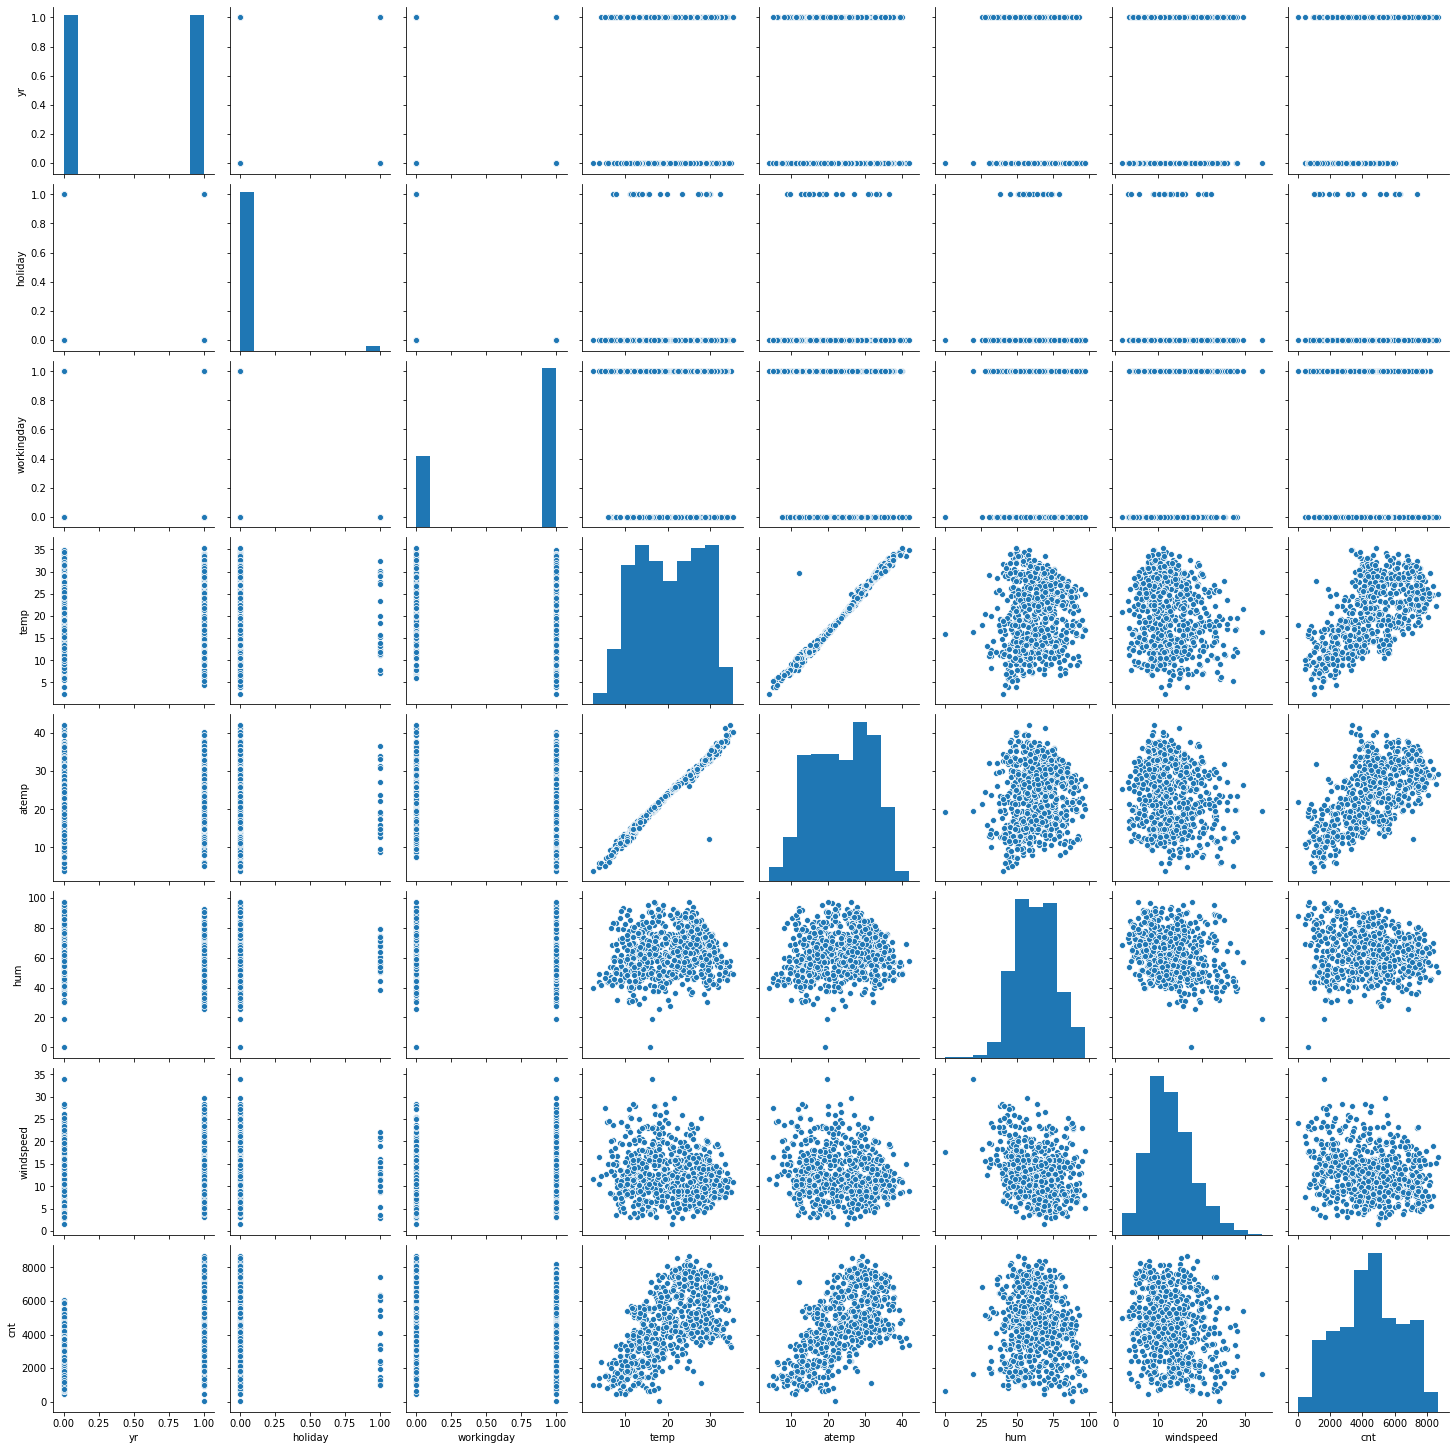

In [34]:
sns.pairplot(data)
plt.show()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Holiday'),
 Text(0.5, 1.0, 'Box Plot On Count Across Holiday')]

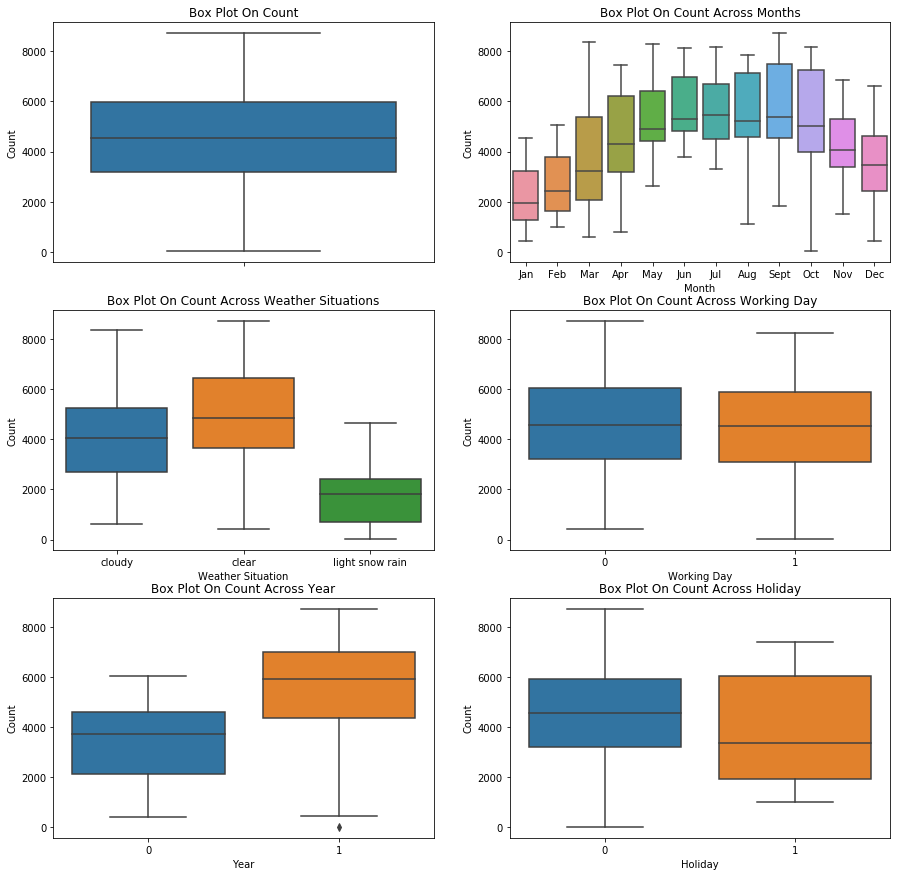

In [35]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="cnt",x="yr",orient="v",ax=axes[2][0])
sns.boxplot(data=data,y="cnt",x="holiday",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Year', ylabel='Count',title="Box Plot On Count Across Year")
axes[2][1].set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holiday")

In [36]:
#The working day and holiday box plots indicate that more bicycles are rent during normal working days than on weekends 
#or holidays. 

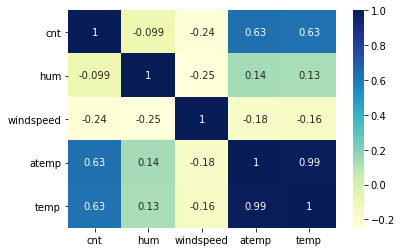

In [37]:
sns.heatmap(data[['cnt','hum','windspeed','atemp','temp']].corr(),annot = True, cmap="YlGnBu")
plt.show()

In [38]:
#atemp and temp are highly co-related

In [39]:
season_dummy=pd.get_dummies(data.season,drop_first = True)

In [40]:
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
mnth_dummy=pd.get_dummies(data.mnth,drop_first = True)

In [42]:
mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [43]:
weekday_dummy=pd.get_dummies(data.weekday,drop_first = True)

In [44]:
weekday_dummy.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [45]:
weathersit_dummy=pd.get_dummies(data.weathersit,drop_first = True)

In [46]:
weathersit_dummy.head()

,cloudy,light snow rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [47]:
data= pd.concat([data,weathersit_dummy,season_dummy,mnth_dummy,weekday_dummy], axis = 1)

In [48]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sept,monday,saturday,sunday,thursday,tuesday,wednesday
0,spring,0,Jan,0,monday,1,cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,tuesday,1,cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data.drop(['season','mnth','weekday','weathersit','atemp'], axis = 1, inplace = True)

In [50]:
# atemp is removed as it is highly co related to the temp multicollinearity can be the issue

In [51]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'cloudy', 'light snow rain', 'spring', 'summer', 'winter', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sept',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [52]:
data.shape

(730, 29)

# Splitting the Data into Training and Testing Sets

In [53]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features
###### We will use MinMax scaling.

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,cloudy,light snow rain,spring,...,May,Nov,Oct,Sept,monday,saturday,sunday,thursday,tuesday,wednesday
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,1,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# Apply scaler() to all the columns except the string and 'dummy' variables
num_vars = ['temp','hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [58]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,cloudy,light snow rain,spring,...,May,Nov,Oct,Sept,monday,saturday,sunday,thursday,tuesday,wednesday
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,1,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1796,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,cloudy,light snow rain,spring,...,May,Nov,Oct,Sept,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,4486.382353,0.343137,0.029412,0.243137,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,1952.158739,0.475223,0.169124,0.429398,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


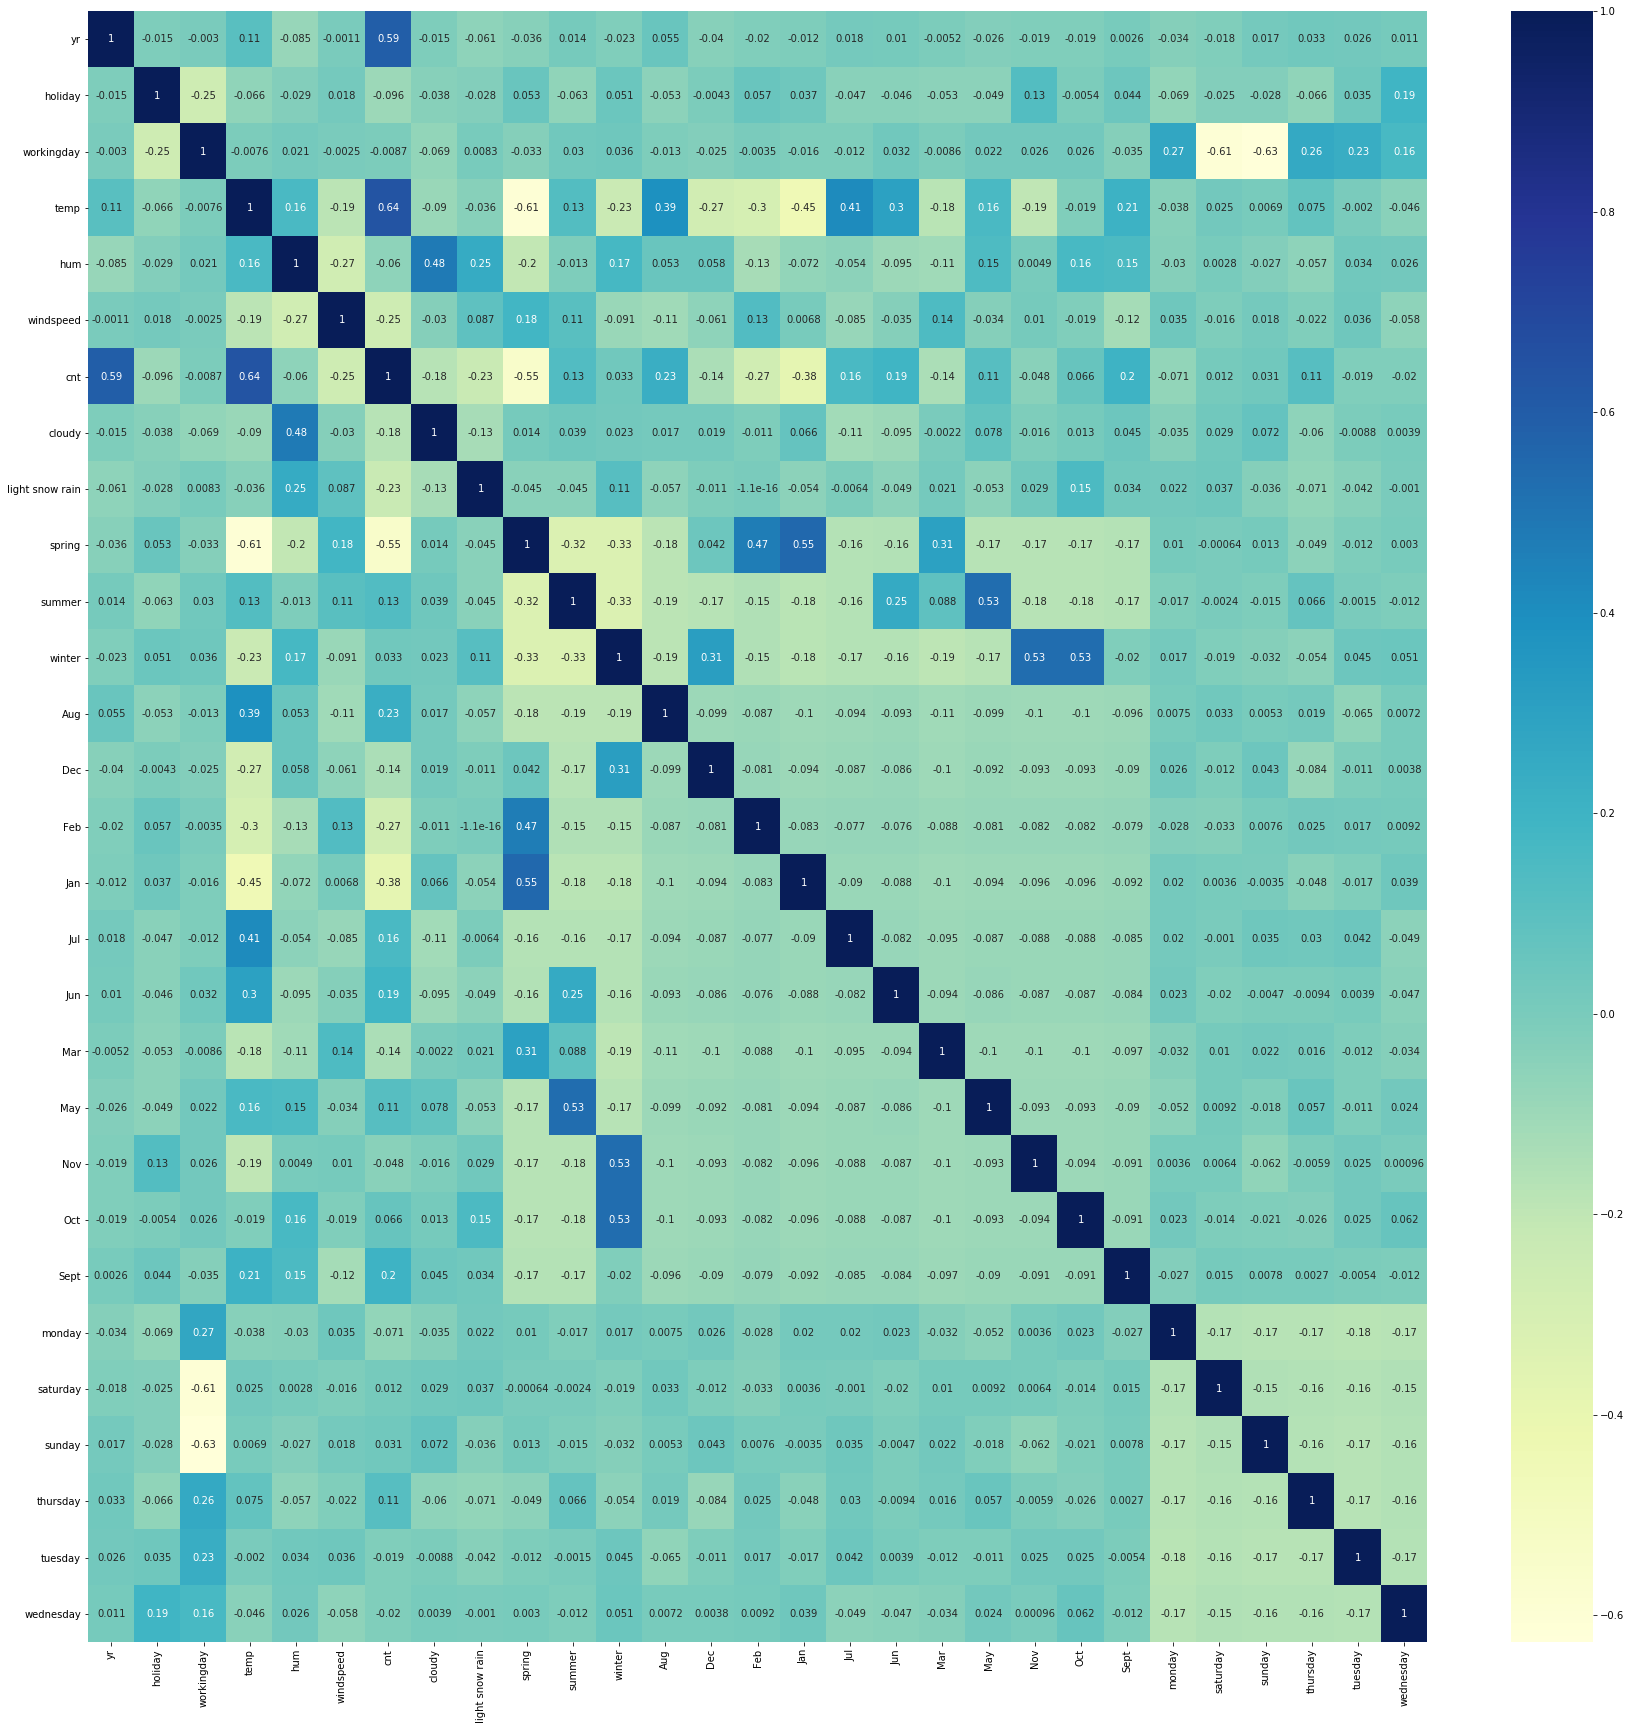

In [60]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [61]:
y_train = df_train.pop('cnt')
X_train = df_train

In [62]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cloudy,light snow rain,spring,summer,...,May,Nov,Oct,Sept,monday,saturday,sunday,thursday,tuesday,wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [63]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [64]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'cloudy', 'light snow rain', 'spring', 'summer', 'winter', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sept',
       'monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [65]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cloudy,light snow rain,spring,summer,...,May,Nov,Oct,Sept,monday,saturday,sunday,thursday,tuesday,wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# RFE

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('cloudy', True, 1),
 ('light snow rain', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('monday', False, 8),
 ('saturday', False, 4),
 ('sunday', False, 5),
 ('thursday', False, 12),
 ('tuesday', False, 7),
 ('wednesday', False, 10)]

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cloudy',
       'light snow rain', 'spring', 'summer', 'winter', 'Dec', 'Jan', 'Jul',
       'Nov', 'Sept'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [72]:
X_train_rfe

,yr,holiday,temp,hum,windspeed,cloudy,light snow rain,spring,summer,winter,Dec,Jan,Jul,Nov,Sept
653,1,0,0.509887,0.575354,0.300794,0,0,0,0,1,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,1,0,0,1,0,0,0,0,0,0
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,1,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,1,0,0,0,1,1,0,0,0,0


# Building model using statsmodel, for the detailed statistics

In [73]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [74]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [75]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        18:54:39   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2805.5562    313.247     

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
8,spring,5.27
3,temp,4.42
10,winter,3.83
9,summer,2.76
4,hum,1.93
14,Nov,1.76
12,Jan,1.68
6,cloudy,1.57
11,Dec,1.49


In [77]:
X.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'cloudy',
       'light snow rain', 'spring', 'summer', 'winter', 'Dec', 'Jan', 'Jul',
       'Nov', 'Sept'],
      dtype='object')

In [78]:
X_train_new = X_train_rfe.drop(["spring"], axis = 1)

In [79]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [80]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [81]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.54e-188
Time:                        18:54:40   Log-Likelihood:                -4115.4
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2249.6749    249.969     

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.75
3,temp,2.32
9,winter,2.08
4,hum,1.90
13,Nov,1.70
11,Jan,1.67
6,cloudy,1.55
10,Dec,1.47
8,summer,1.44
12,Jul,1.43


In [83]:
X_train_new = X_train_new.drop(["Nov"], axis = 1)

In [84]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [85]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [86]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.25e-189
Time:                        18:54:42   Log-Likelihood:                -4116.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2193.6594    248.168     

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.82
3,temp,2.25
4,hum,1.90
11,Jan,1.63
6,cloudy,1.55
9,winter,1.55
8,summer,1.43
12,Jul,1.43
10,Dec,1.26
7,light snow rain,1.25


In [88]:
X_train_new = X_train_new.drop(["Dec"], axis = 1)

In [89]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [90]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [91]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.03e-190
Time:                        18:54:43   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2145.9539    245.307     

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
6,cloudy,1.55
10,Jan,1.55
9,winter,1.53
11,Jul,1.43
8,summer,1.41
7,light snow rain,1.24
5,windspeed,1.19


# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [93]:
y_train_pred= lm.predict(X_train_lm)

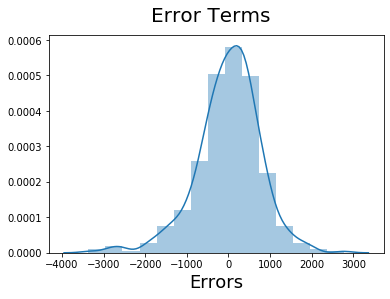

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

In [95]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8414662716656823

# Making Predictions

###### Applying the scaling on the test sets

In [96]:
#Applying the scaling on the test sets
num_vars = ['temp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [97]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,cloudy,light snow rain,spring,...,May,Nov,Oct,Sept,monday,saturday,sunday,thursday,tuesday,wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,4546.981735,0.319635,0.027397,0.255708,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,1898.633630,0.467403,0.163612,0.437258,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [98]:
y_test = df_test.pop('cnt')
X_test = df_test

In [99]:
# Adding constant variable to test dataframe

X_test_new = sm.add_constant(X_test)


In [100]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'cloudy',
       'light snow rain', 'summer', 'winter', 'Jan', 'Jul', 'Sept'],
      dtype='object')

In [101]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_new=X_test_new.drop(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct','monday', 'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday','spring','Nov','Dec'],axis=1)

In [102]:
X_test_new.shape

(219, 13)

In [103]:
y_pred = lm.predict(X_test_new)

# Model Evaluation

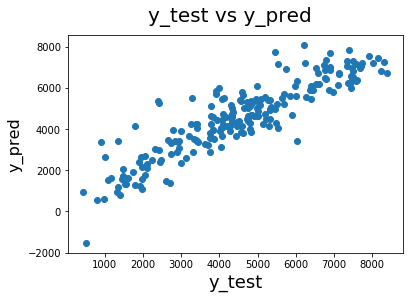

In [104]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [105]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8029170032329542

In [106]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.03e-190
Time:                        18:54:47   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2145.9539    245.307      8.748      0.000    1663.988    2627.920
yr               1989.6797     70.787     28.108      0.000    1850.602    2128.758
holiday          -856.6581    222.747     -3.846      0.000   -1294.299    -419.017
temp             4969.0281    221.618     22.422      0.000    4533.605    5404.452
hum             -1532.8724    328.109     -4.672      0.000   -2177.525    -888.220
windspeed       -1690.3369    224.142     -7.541      0.000   -2130.720   -1249.953
cloudy           -450.7975     91.298     -4.938      0.000    -630.175    -271.420
light snow rain -2053.4327    229.549     -8.946      0.000   -2504.438   -1602.428
summer            647.4056     96.232      6.728      0.000     458.334     836.478
winter           1093.8858     99.573     10.986      0.000     898.250    1289.522
Jan              -330.4766    152.743     -2.164      0.031    -630.578     -30.376
Jul              -409.5862    156.807     -2.612      0.009    -717.673    -101.500
Sept              818.1271    139.936      5.846      0.000     543.187    1093.067
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

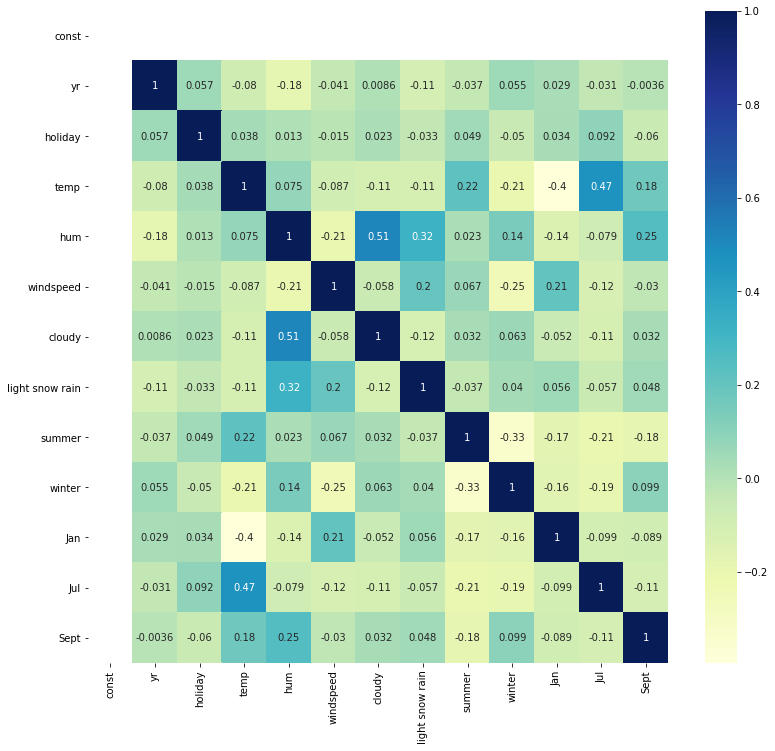

In [107]:
plt.figure(figsize = (13, 12))
sns.heatmap(X_test_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [108]:
lm.params

const              2145.953919
yr                 1989.679711
holiday            -856.658142
temp               4969.028121
hum               -1532.872439
windspeed         -1690.336869
cloudy             -450.797487
light snow rain   -2053.432658
summer              647.405628
winter             1093.885826
Jan                -330.476632
Jul                -409.586207
Sept                818.127135
dtype: float64

In [109]:
# temp has the highest coefficient so temp is highly affecting the demand as temp increases the dependent variable increases 

In [110]:
#holiday has a negative coefficient so during holiday people go out and they dont have time hence demand for it is less

In [ ]:
#sept has positive coefficient we can say that during sept people tend to opt for bike 

In [ ]:
#cloudy has negative coefficient we can say that during cloudy weather people tend to use car or bus

In [ ]:
#hum has negative coefficient we can say that during hum high people choose cars and bus over bikes

In [ ]:
#light and snow rain has negative coefficient we can say that during light and snow rain people choose cars and bus over bikes

In [ ]:
# jan has  a negative coefficient because during jan snowfall rain happens hence people tend to choose cars or bus over bikes

In [ ]:
# jul has  a negative coefficient because during jul rainfall happens hence people tend to choose cars or bus over bikes

In [ ]:
# yr has a high positive coefficient so as the yr increases the demand increases 

In [ ]:
# summer has a positive coefficient during summer the demand increases 